In [1]:
from aws import AwsController
from Model.model import NER, Formal
from Preprocess.Data_load import DataLoad

2023-06-29 12:20:45.306613: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-29 12:20:45.348361: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 12:20:45.956134: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
aws_controller = AwsController()
df = aws_controller.s3_download(["preprocessed.csv"], "src/")["preprocessed"]

preprocessed.csv


In [3]:
def Formalprocess(script) : 
    model = Formal()
    script_list = script.split('/')
    formal_check = 0 
    for sentence in script_list :
        if model.pred(sentence) == 1 : 
            formal_check += 1 
    formal_ratio = formal_check / len(script_list)
    return formal_ratio

In [4]:
def NERprocess(ckpt_path,conf_path,script) : 
    model = NER(ckpt_path,conf_path)
    script_list = script.split('/')
    label_list = [] 
    for sentence in script_list :
        label_list += model.inference_fn(sentence)
    return label_list

In [5]:
def exist_label(label_list) : 
    new_label_list = []
    for label in label_list :
        if all([label != 'O',  label[-2:] != '-I']): 
            new_label_list.append(label[:3])
    return new_label_list


In [10]:
df['Formal_ratio'] = df['texts'].apply(lambda x : Formalprocess(x))

KeyboardInterrupt: 

In [ ]:
df['NER_label'] = df['texts'].apply(lambda x : NERprocess(ckpt_path='./Model/pytorch_model.bin',conf_path='./Model/config.json',script=x))

In [ ]:
df['exist_label'] = df['NER_label'].apply(lambda x : exist_label(x))

In [ ]:
df[['texts','NER_label','exist_label']]

,texts,NER_label,exist_label
0,지난 시간에 이제 인수분해 가 뭐냐라는 것에 대해서 조금 배워 봤는데 그래서 선생님...,"[FLD-B, AFW-B, NUM-I, PLT-B, PLT-B, EVT-B, FLD...","[FLD, AFW, PLT, PLT, EVT, FLD, FLD, AFW, FLD, ..."
1,우 우리가 학교 수학에서 배우는 방정식 뜰은 대 개의 정수를 개수로 갖는다 음식들입...,"[DAT-I, O, PLT-B, DAT-I, AFW-B, NUM-I, PLT-B, ...","[PLT, AFW, PLT, NUM, PLT, PLT, ORG, MAT, PLT, ..."
2,안녕하세요/색 뺄 수 학이에요/이번 시간이 이차방정식의 괜 구하기를 그네 공식으로 ...,"[ORG-I, PER-I, ORG-I, ORG-I, ORG-I, ORG-I, LOC...","[LOC, TRM, PER, TRM, PER, LOC, TRM, LOC, TRM, ..."
3,반갑습니다/수학의 정석 실력 편 차이입니다/자이다 온 일당 음에 공부했던 거하고 유...,"[PLT-I, PER-I, PLT-I, PER-I, ANM-B, ANM-B, ANM...","[ANM, ANM, ANM, TRM, ANM, AFW, NUM, ANM, AFW, ..."
4,어떤 수나 당시 글 곱하기 의 꼴로 나타낼 수 있을 때 와 를 어떤 수 혹은 당시 ...,"[EVT-I, AFW-I, EVT-I, EVT-I, AFW-I, EVT-I, EVT...","[NUM, PER, NUM, ANM, ANM, PER, FLD, ANM, NUM, ..."
...,...,...,...
74,인수가 아닌 것을 고르는 것에 대한 문제를 선생님이 초등학교 이런 것부터 고등학교 ...,"[MAT-I, ANM-B, NUM-I, EVT-I, NUM-I, MAT-I, NUM...","[ANM, DAT, ORG, ORG, CVL, ORG, DAT, ANM, CVL, ..."
75,에 대한 차 식과 차 식을 곱하면에 대한 차 시기 나오죠/ 에 관한 차 항 창상상...,"[CVL-I, DAT-B, CVL-I, TIM-B, ANM-B, PLT-B, PLT...","[DAT, TIM, ANM, PLT, PLT, PLT, ANM, PLT, TIM, ..."
76,이차방정식 근의 공식에 대해서 공부해 보도록 하겠습니다/자이트 공식은 요/굉장히 중...,"[EVT-I, NUM-B, MAT-I, ORG-I, PLT-I, PLT-I, PLT...","[NUM, PLT, ORG, PLT, CVL, FLD, NUM, MAT, ORG, ..."
77,뭐네 오늘은 그 그네 공식하고 이제 짝수 그해 봄 시카고 선생님이 증명하는 시간을 ...,"[MAT-I, EVT-B, MAT-I, MAT-I, MAT-I, O, MAT-I, ...","[EVT, EVT, NUM, NUM, NUM, NUM, EVT, EVT, NUM, ..."


In [6]:
script_list = df['texts'][1].split('/')

In [8]:
NER_list = []
ckpt_path='./Model/pytorch_model.bin'
conf_path='./Model/config.json'
model = NER(ckpt_path,conf_path)
for script in script_list : 
    label = model.inference_fn(sentence=script)
    NER_list.append(label)

In [9]:
model.inference_fn('첫 번째 문제를 풀어볼게요')

[['첫', 'FLD-I'],
 ['번', 'EVT-I'],
 ['##째', 'CVL-B'],
 ['문제를', 'EVT-I'],
 ['풀어', 'ANM-B'],
 ['##볼', 'ANM-B'],
 ['##게요', 'FLD-I']]

In [10]:
script_list

['우 우리가 학교 수학에서 배우는 방정식 뜰은 대 개의 정수를 개수로 갖는다 음식들입니다',
 '그리고 이런 위에 방정식의 근을 찾는 문제가 나온다면 일반적으로 인수분해를 통해 그늘 찾게 되죠',
 '이 채널을 보시는 분들은 너무나 많은 인수 분의 문제를 풀어 보셨을 거라 익숙하게 짜 권법을 써서 암산으로 인수분해 한 후 그늘 찾으셨습니다',
 '반면에 그리 잘 보이지 않는 방영 시기 나온다면 어떻게 할까요',
 '귀찮겠지만 중학교 때의 주야장천 의 어떤 근의 공식을 사용해서 끝은 그늘 찾으실 것입니다',
 '차 이상의 방정식은 어떻게 할까요',
 '차 와 차까지는 일반적인 근의 공식이 있습니다',
 '하지만 교육과정 사는 배우지 않고 배워서 써먹는다에도 너무 어렵습니다',
 '그래서 우리는 불 반적으로 글이 될 것 같은 수도를 가져와서 이를 이용해 조리 비법을 사용합니다',
 '그리고 차수를 낮추면서 인수분해 를 하죠',
 '저는 이번 영상을 통해 일반 쪽으로 글이 될 것 같은 수를 찾는 스킬에 집중해 보고자 합니다',
 '여러분들이 다항식의 큰 을 찾을 때 가장 많이 사용하는 스킬은 상소 항에 약수를 근으로 생각하는 것입니다',
 '그리고 먹는 문제들에서는 곧잘 통합니다',
 '혹시 여기 법칙 같은 게 있을까요',
 '사실 정수를 개수로 갖는 다항식의 유리 수건을 찾는 방법에 대한 정리가 있습니다',
 '정수를 개수로 갖는다 음식의 리수 그는 윤은혜 이번에라고 한다면 애인은 최고 창의 개수에 약수 이고는 상소 항에 악수입니다',
 '이는 수업 시간에 선생님들이 많이 알려주시는 스킬이라 자주 사용하실 텐데 왜 이렇게 되는지 알아보죠',
 '명제를 보면 정수 계수 당시 길이 두 그늘 갖는다면 이는 가정에 와해는이므로 에를 대입하면 다음과 같이 식을 접을 수 있습니다',
 '이제 분모를 없애주기 울 양변에 제곱을 곱해주면 시기 다음과 같이 정리됩니다',
 '좌변에서 첫 번째 않을 우편으로 항시 켜주면 번씩 마지막 하늘 이양 시켜주면 이번 식인 등식을 얻게 됩니

In [11]:
script_list[1], NER_list[1]

('그리고 이런 위에 방정식의 근을 찾는 문제가 나온다면 일반적으로 인수분해를 통해 그늘 찾게 되죠',
 [['그리고', 'EVT-I'],
  ['이런', 'AFW-B'],
  ['위에', 'EVT-I'],
  ['방', 'EVT-I'],
  ['##정', 'PLT-B'],
  ['##식의', 'EVT-I'],
  ['근', 'PER-B'],
  ['##을', 'EVT-I'],
  ['찾는', 'AFW-I'],
  ['문제가', 'EVT-I'],
  ['나온다', 'MAT-B'],
  ['##면', 'EVT-I'],
  ['일반', 'PLT-B'],
  ['##적으로', 'EVT-I'],
  ['인수', 'NUM-I'],
  ['##분해', 'EVT-I'],
  ['##를', 'ANM-B'],
  ['통해', 'ANM-B'],
  ['그', 'EVT-I'],
  ['##늘', 'EVT-I'],
  ['찾', 'AFW-B'],
  ['##게', 'ANM-B'],
  ['되', 'ANM-I'],
  ['##죠', 'FLD-I']])

In [16]:
df['token'] = df['texts'].apply(lambda x : NER.NERtokenizer(x))

In [18]:
print(df['NER_label'][0])

['FLD-I', 'FLD-I', 'NUM-I', 'NUM-I', 'NUM-I', 'TIM-B', 'O', 'TIM-B', 'NUM-I', 'NUM-I', 'ORG-I', 'NUM-I', 'PER-I', 'NUM-I', 'AFW-B', 'NUM-I', 'NUM-I', 'O', 'FLD-I', 'NUM-B', 'FLD-I', 'TRM-I', 'AFW-I', 'PER-I', 'FLD-I', 'LOC-B', 'TRM-I', 'AFW-I', 'NUM-I', 'PER-I', 'NUM-I', 'FLD-I', 'NUM-I', 'ORG-I', 'FLD-I', 'NUM-I', 'EVT-B', 'FLD-I', 'MAT-I', 'NUM-I', 'TIM-B', 'NUM-I', 'NUM-I', 'AFW-I', 'FLD-I', 'ORG-I', 'AFW-I', 'O', 'NUM-I', 'NUM-I', 'NUM-I', 'ORG-I', 'ORG-I', 'O', 'O', 'NUM-I', 'FLD-I', 'AFW-B', 'NUM-I', 'NUM-I', 'NUM-I', 'ORG-I', 'NUM-I', 'NUM-I', 'ORG-I', 'NUM-I', 'PER-I', 'TRM-I', 'PER-I', 'NUM-I', 'NUM-I', 'O', 'ORG-I', 'CVL-B', 'AFW-I', 'NUM-I', 'NUM-I', 'AFW-I', 'NUM-I', 'NUM-I', 'O', 'AFW-I', 'ORG-I', 'NUM-I', 'NUM-I', 'FLD-I', 'ORG-I', 'ORG-I', 'TRM-I', 'NUM-I', 'ORG-I', 'TIM-I', 'O', 'NUM-B', 'ORG-B', 'AFW-B', 'AFW-I', 'NUM-I', 'ORG-I', 'O', 'LOC-B', 'O', 'PER-I', 'FLD-I', 'ORG-I', 'AFW-B', 'ORG-I', 'ORG-I', 'O', 'AFW-B', 'FLD-I', 'NUM-I', 'O', 'O', 'O', 'O', 'NUM-I', 'NUM-I

In [19]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df.sort_values(by='viewCount',ascending=False,inplace=True)

In [62]:
pop_df = df.iloc[:30]
unpop_df = df.iloc[-30:]

In [63]:
pop_all_label = pop_df['exist_label'].sum()
pop_all_label = dict(Counter(pop_all_label))
pop_all_label = dict(sorted(pop_all_label.items()))
pop_label_total = sum(pop_all_label.values())
pop_ratio_data = {key: value / pop_label_total for key, value in pop_all_label.items()} 

In [64]:
unpop_all_label = unpop_df['exist_label'].sum()
unpop_all_label = dict(Counter(unpop_all_label))
unpop_all_label = dict(sorted(unpop_all_label.items()))
unpop_label_total = sum(unpop_all_label.values())
unpop_ratio_data = {key: value / unpop_label_total for key, value in unpop_all_label.items()} 

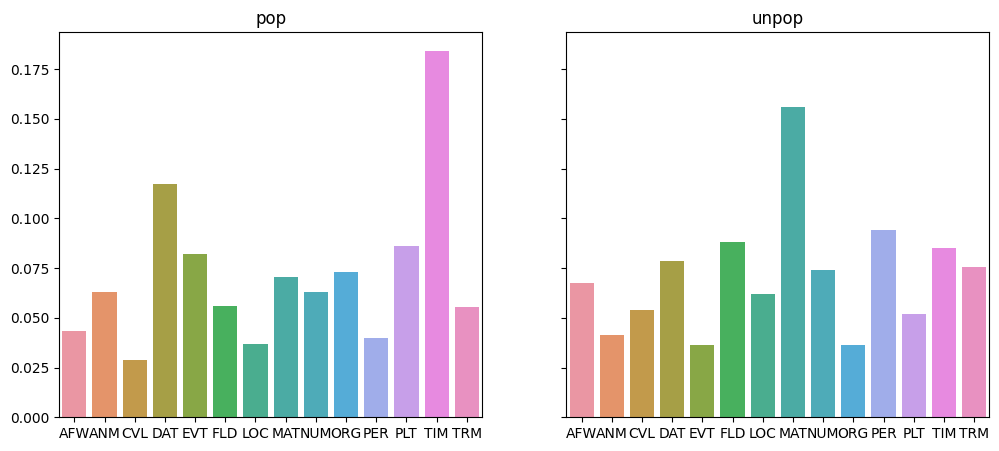

In [49]:
fig, ax = plt.subplots(1,2, sharey=True , figsize=(12,5)) 
sns.barplot(x = list(pop_ratio_data.keys()), y = list(pop_ratio_data.values()), ax=ax[0])
ax[0].set_title('pop')
sns.barplot(x = list(unpop_ratio_data.keys()), y = list(unpop_ratio_data.values()), ax=ax[1])
ax[1].set_title('unpop')
plt.show()

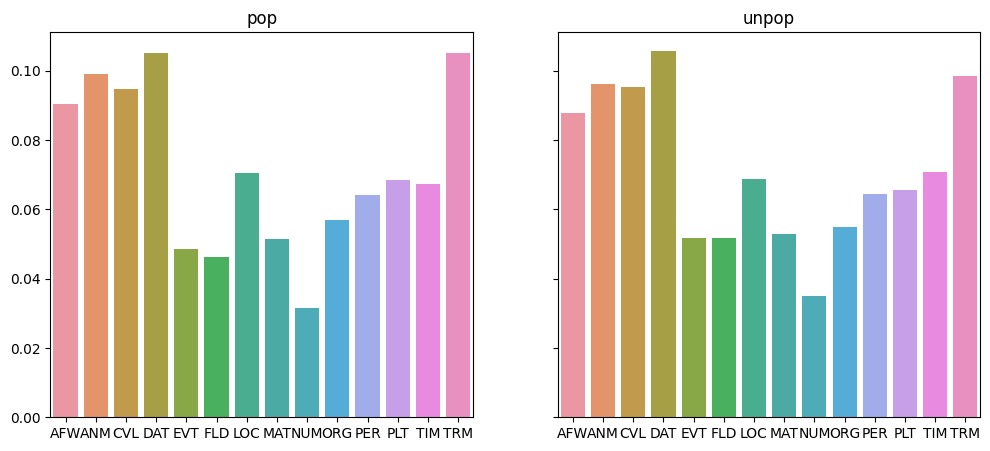

In [65]:
fig, ax = plt.subplots(1,2, sharey=True , figsize=(12,5)) 
sns.barplot(x = list(pop_ratio_data.keys()), y = list(pop_ratio_data.values()), ax=ax[0])
ax[0].set_title('pop')
sns.barplot(x = list(unpop_ratio_data.keys()), y = list(unpop_ratio_data.values()), ax=ax[1])
ax[1].set_title('unpop')
plt.show()

In [50]:
import pandas as pd 

In [53]:
pop_df = pd.read_csv('./Data/pop_processing_NER.csv')

In [57]:
df = pop_df.groupby('id').sum()

In [58]:
df['NER_label'] = df['script'].apply(lambda x : NERprocess(ckpt_path='./Model/pytorch_model.bin',conf_path='./Model/config.json',script=x))
df['token'] = df['script'].apply(lambda x : NER.NERtokenizer(x))

{'0': 'O', '1': 'PER-B', '10': 'LOC-I', '11': 'CVL-B', '12': 'CVL-I', '13': 'DAT-B', '14': 'DAT-I', '15': 'TIM-B', '16': 'TIM-I', '17': 'NUM-B', '18': 'NUM-I', '19': 'EVT-B', '2': 'PER-I', '20': 'EVT-I', '21': 'ANM-B', '22': 'ANM-I', '23': 'PLT-B', '24': 'PLT-I', '25': 'MAT-B', '26': 'MAT-I', '27': 'TRM-B', '28': 'TRM-I', '3': 'FLD-B', '4': 'FLD-I', '5': 'AFW-B', '6': 'AFW-I', '7': 'ORG-B', '8': 'ORG-I', '9': 'LOC-B'}
{'0': 'O', '1': 'PER-B', '10': 'LOC-I', '11': 'CVL-B', '12': 'CVL-I', '13': 'DAT-B', '14': 'DAT-I', '15': 'TIM-B', '16': 'TIM-I', '17': 'NUM-B', '18': 'NUM-I', '19': 'EVT-B', '2': 'PER-I', '20': 'EVT-I', '21': 'ANM-B', '22': 'ANM-I', '23': 'PLT-B', '24': 'PLT-I', '25': 'MAT-B', '26': 'MAT-I', '27': 'TRM-B', '28': 'TRM-I', '3': 'FLD-B', '4': 'FLD-I', '5': 'AFW-B', '6': 'AFW-I', '7': 'ORG-B', '8': 'ORG-I', '9': 'LOC-B'}
{'0': 'O', '1': 'PER-B', '10': 'LOC-I', '11': 'CVL-B', '12': 'CVL-I', '13': 'DAT-B', '14': 'DAT-I', '15': 'TIM-B', '16': 'TIM-I', '17': 'NUM-B', '18': 'NUM-

In [60]:
df['exist_label'] = df['NER_label'].apply(lambda x : exist_label(x))